In [26]:
import pandas as pd
from os import path
import numpy as np
import plotly.express as px
import seaborn as sns
from typing import Dict, List, Tuple, Sequence

In [27]:
df = pd.read_csv(path.join("..","data", "carbon_dioxide", "co2_yearly_ipcc_total.csv"))
df.head()

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,Y_1975,Y_1976,Y_1977,Y_1978,Y_1979,Y_1980,Y_1981,Y_1982,Y_1983,Y_1984,Y_1985,Y_1986,Y_1987,Y_1988,Y_1989,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,Y_2007,Y_2008,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
0,Non-Annex_I,Rest Central America,ABW,Aruba,CO2,95.065424,94.503709,105.847814,109.863856,99.977179,114.650537,105.098610,113.485712,115.610136,109.361049,110.202655,111.935635,102.831097,104.994149,121.185689,118.871134,117.597586,120.998266,428.310988,522.596351,531.673589,626.169911,726.346411,697.671507,763.672436,820.730467,550.823430,838.036216,839.623484,886.536977,950.988094,977.166414,996.511790,1288.471086,1338.638889,1377.274130,1339.132001,1369.656688,1288.139642,1387.899058,1345.968976,1286.369279,1637.822831,1605.689731,1633.584420,1626.234050,1597.398255,1335.792882,1366.614574,1404.705123,1166.018409,1295.818804
1,Non-Annex_I,India +,AFG,Afghanistan,CO2,3343.054709,3318.411036,3545.865063,3592.563616,4075.638761,3968.135977,3876.509247,4152.041045,3871.999215,3934.218974,3832.229099,4021.254088,4005.965881,4637.964440,4786.285169,5632.903237,5392.432342,4841.959263,4544.738313,4318.738932,4315.742439,4218.646151,3105.436547,3246.796483,3269.470692,3483.691430,3716.706154,3910.140351,4036.375669,3884.130274,3504.449671,3456.670869,3967.050030,4382.530772,4027.989583,5001.569608,4949.225837,5880.817069,7366.305492,10791.187530,12061.637624,15573.224097,14462.288815,12796.268484,12478.108782,12551.087669,11760.799383,12117.693742,12736.811832,12215.717086,12525.011330,12553.576369
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,22666.196272,19201.301175,24020.700414,26410.708507,26487.027464,26861.308092,25888.633268,25620.805568,26293.854273,26643.647803,27616.242673,28099.085662,28632.242976,29310.776810,29702.183130,26025.382685,27096.481653,27801.150922,28127.608325,27787.676875,29453.900602,32430.325983,33295.920830,34310.556491,35354.810082,34104.669590,34184.397138,34324.976979,36045.571750,36788.078823,35325.283451,36353.193475,37491.020928,39679.774031,42655.564104,44770.499444,46455.168480,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
3,Non-Annex_I,Rest Central America,AIA,Anguilla,CO2,2.168292,2.168325,2.263753,2.108963,2.350261,2.584030,2.434477,2.537065,2.901614,3.213011,4.412635,6.639773,7.018853,6.088891,5.801136,3.670826,3.154646,6.125876,5.797213,6.148498,6.114424,7.579440,7.902936,9.952196,13.131270,16.395665,16.213344,13.563752,12.448764,11.750832,15.531534,15.910759,10.858915,14.107818,13.471890,13.661616,12.812443,12.354729,15.268477,20.160958,24.004496,26.008055,26.023228,27.940512,27.896061,28.005426,28.339881,29.062445,28.222994,27.579993,22.779488,25.408720
4,Int. Aviation,Int. Aviation,AIR,Int. Aviation,CO2,169300.996554,169300.996554,179147.487130,186892.096441,179793.330898,173866.019591,174273.790637,190068.978236,197222.627759,203975.127986,202807.888911,202067.993164,209348.468189,211187.450018,219125.396764,225156.168309,247390.953185,261563.742898,276366.712793,290296.645404,258993.781258,251900.903152,260067.858229,265022.084659,278583.570164,289103.425140,300847.662832,315607.703574,326243.075691,340142.087101,352628.829209,346128.097935,366703.238307,364670.144022,393904.639907,418838.790420,434148.654181,448063.493232,455899.982240,434205.492253,458205.041820,472112.408264,472721.118697,480909.126246,496627.696509,524654.034526,548207.777357,582230.489693,609630.481638,617763.229264,338144.083387,390166.250062


In [28]:
emmision_columns = list(set(df.columns) - set(["IPCC_annex", "C_group_IM24_sh", "Country_code_A3", "Name", "Substance"]))


In [29]:
df_req_col = df[emmision_columns + ["Name"]]
df_req_col = df_req_col.set_index("Name").transpose()
df_req_col.reset_index(inplace=True)
df_req_col.rename(columns={"index":"Year"}, inplace=True)

In [30]:
df_req_col.reset_index(drop=True, inplace=True)
df_req_col["Year"] = pd.to_datetime(df_req_col["Year"], format='Y_%Y')
df_req_col.sort_values("Year", inplace=True)
df_req_col.reset_index()
df_sorted = df_req_col
df_sorted.reset_index(drop= True, inplace= True)
df_sorted.head()


Name,Year,Aruba,Afghanistan,Angola,Anguilla,Int. Aviation,Albania,Netherlands Antilles,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,Congo_the Democratic Republic of the,Congo,Cook Islands,Colombia,Comoros,Cape Verde,Costa Rica,Cuba,Cayman Islands,Cyprus,Czech Republic,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,Eritrea,Western Sahara,Spain,Estonia,Ethiopia,Finland,Fiji,Falkland Islands (Malvinas),France,Faroe Islands,Gabon,United Kingdom,Georgia,Ghana,Gibraltar,Guinea,Guadeloupe,Gambia,Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,French Guiana,Guyana,Hong Kong,Honduras,Croatia,Haiti,Hungary,Indonesia,India,Ireland,"Iran, Islamic Republic of",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyzstan,Cambodia,Kiribati,Saint Kitts and Nevis,"Korea, Republic of",Kuwait,Lao People's Democratic Republic,Lebanon,Liberia,Libyan Arab Jamahiriya,Saint Lucia,Sri Lanka,Lesotho,Lithuania,Luxembourg,Latvia,Macao,Morocco,"Moldova, Republic of",Madagascar,Maldives,Mexico,"Macedonia, the former Yugoslav Republic of",Mali,Malta,Myanmar,Mongolia,Mozambique,Mauritania,Martinique,Mauritius,Malawi,Malaysia,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,Oman,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Puerto Rico,"Korea, Democratic People's Republic of",Portugal,Paraguay,French Polynesia,Qatar,Reunion,Romania,Russian Federation,Rwanda,Saudi Arabia,Serbia and Montenegro,Sudan,Int. Shipping,Senegal,Singapore,Saint Helena,Solomon Islands,Sierra Leone,El Salvador,Somalia,Saint Pierre and Miquelon,Sao Tome and Principe,Suriname,Slovakia,Slovenia,Sweden,Swaziland,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Turkmenistan,Timor-Leste,Tonga,Trinidad and Tobago,Tunisia,Turkey,Taiwan_Province of China,Tanzania_United Republic of,Uganda,Ukraine,Uruguay,United States,Uzbekistan,Saint Vincent and the Grenadines,Venezuela,Virgin Islands_British,Viet Nam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,1970-01-01,95.065424,3343.054709,20393.274068,2.168292,169300.996554,6495.392463,14518.577946,19437.564124,117798.023151,11059.939079,322.244338,210117.768477,58662.457278,32576.554582,4385.562636,141464.774714,4318.786819,8158.106987,46309.647062,72880.670237,2962.385649,3778.603098,16459.223218,70208.993932,1391.090849,427.056131,6807.007040,345945.212484,1736.447565,2126.245654,1170.135562,947.246888,2221.039837,412974.716734,42795.719205,34724.199573,1.606950e+06,7713.156989,11614.401432,27326.490815,2926.865147,20.278299,67142.930949,112.599569,277.173709,5094.356829,105804.558616,82.881365,2260.312803,191290.947606,1.096970e+06,920.328816,132.315777,64410.118292,15259.058130,19019.443783,14586.758732,36535.688004,2106.258533,86.844046,148542.821119,23188.608897,43392.140923,69822.539601,4696.098641,20.541377,512664.075854,0.800205,2861.478913,688007.797666,29650.221106,10316.038900,69.424257,9982.374415,1392.492294,426.830205,1069.052342,96.871198,32662.038944,47.029210,2.380853,20105.036239,448.268831,5579.550369,9631.227371,7784.494465,26223.024585,8172.680961,69914.493184,203045.292391,761092.373791,21207.543075,81607.284110,24154.889339,1949.222413,15067.991478,322984.309529,11662.982460,2806.719775,8.739406e+05,164413.411381,20705.283360,15201.250317,15998.831094,22.308658,351.679323,63122.660293,38382.164654,5042.526835,5819.732041,3033.720791,39730.595411,167.743670,15022.616488,2721.849360,22635.880961,18500.273916,18933.690822,331.274420,11295.282548,17617.890655,6383.008870,15.186518,158301.735426,9604.246665,3623.642622,713.285069,41894.615103,6047.525778,24200.035990,1280.068482,853.859710,59

In [31]:
df_china = df_sorted[["Year", "China"]]
df_china.head()

Name,Year,China
0,1970-01-01,1.606950e+06
1,1971-01-01,1.611013e+06
2,1972-01-01,1.688336e+06
3,1973-01-01,1.744502e+06
4,1974-01-01,1.776667e+06


In [32]:
Target = "China"
N_TARGETS = 1
N_FEATURES = 1
FOLD_LENGTH = 30
FOLD_STRIDE = 5
TRAIN_TEST_RATIO = 0.66
INPUT_LENGTH = 10
OUTPUT_LENGTH = 1
SEQUENCE_STRIDE = 1

In [33]:
# Data manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data Visualiation
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os


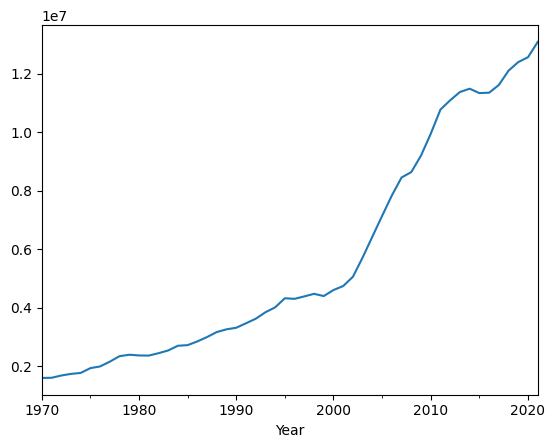

In [34]:
plot_features = df_china["China"]
plot_features.index = df_china.Year
plot_features.plot(subplots = True);

In [35]:
df_china_only_emmisions = df_china.drop(columns=["Year"], inplace=False)
df_china_only_emmisions.head()

Name,China
0,1.606950e+06
1,1.611013e+06
2,1.688336e+06
3,1.744502e+06
4,1.776667e+06


In [36]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> List[pd.DataFrame]:
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold
    
    Returns a list of folds, each as a DataFrame
    '''
    folds = []
    for i in range(0, len(df)-fold_length, fold_stride):
        folds.append(df.loc[i:fold_length-1])
    return folds

In [37]:
folds = get_folds(df_china_only_emmisions, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 5 folds.
Each fold has a shape equal to (30, 1).


In [38]:
folds[0].head()

Name,China
0,1.606950e+06
1,1.611013e+06
2,1.688336e+06
3,1.744502e+06
4,1.776667e+06


In [39]:
import math
def train_test_split(fold:pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int) -> Tuple[pd.DataFrame]:
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))   
    '''
    split_point = round(train_test_ratio * len(fold))
    print(split_point)
    return (fold.loc[0:split_point-1], fold.loc[split_point-input_length:])

In [40]:
fold = folds[0]

(fold_train, fold_test) = train_test_split(fold, TRAIN_TEST_RATIO, INPUT_LENGTH)

20


In [41]:
fold_test

Name,China
10,2.374247e+06
11,2.369430e+06
12,2.449800e+06
13,2.544059e+06
14,2.704993e+06
15,2.726077e+06
16,2.852858e+06
17,3.002174e+06
18,3.173726e+06
19,3.265879e+06


In [42]:
import random
def get_Xi_yi(
    fold:pd.DataFrame, 
    input_length:int, 
    output_length:int):
    '''
    - given a fold, it returns one sequence (X_i, y_i)
    - with the starting point of the sequence being chosen at random
    '''
    max_index_for_ip_start = len(fold) - (input_length + output_length)
    input_start = random.randint(0,max_index_for_ip_start)
    x_start = input_start
    x_end = input_start + input_length
    y_start = x_end
    y_end = y_start + output_length
    Xi = fold.iloc[x_start: x_end]
    yi = fold[["China"]].iloc[y_start: y_end]
    return (Xi, yi)

In [43]:

X_train_i, y_train_i = get_Xi_yi(fold_train, INPUT_LENGTH, OUTPUT_LENGTH)
X_test_i, y_test_i   = get_Xi_yi(fold_test , INPUT_LENGTH, OUTPUT_LENGTH)

In [44]:
def get_X_y(
    fold:pd.DataFrame,
    number_of_sequences:int,
    input_length:int,
    output_length:int
):
    X = []
    y = []
    for i in range(number_of_sequences):
        Xi, yi = get_Xi_yi(fold, input_length, output_length)
        X.append(Xi)
        y.append(yi)
    return (tf.Tensor(X), tf.Tensor(y))

In [45]:
def get_X_y_strides(fold: pd.DataFrame, input_length: int, output_length: int, sequence_stride: int):
    '''
    - slides through a `fold` Time Series (2D array) to create sequences of equal
        * `input_length` for X,
        * `output_length` for y,
    using a temporal gap `sequence_stride` between each sequence
    - returns a list of sequences, each as a 2D-array time series
    '''

    X, y = [], []

    for i in range(0, len(fold), sequence_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (i + input_length + output_length) >= len(fold):
            break
        X_i = fold.iloc[i:i + input_length, :]
        y_i = fold.iloc[i + input_length:i + input_length + output_length, :][[Target]]
        X.append(X_i)
        y.append(y_i)

    return np.array(X), np.array(y)

In [46]:

X_train, y_train = get_X_y_strides(fold_train, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)
X_test, y_test = get_X_y_strides(fold_test, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
fold_test

(9, 10, 1)
(9, 1, 1)
(9, 10, 1)
(9, 1, 1)


Name,China
10,2.374247e+06
11,2.369430e+06
12,2.449800e+06
13,2.544059e+06
14,2.704993e+06
15,2.726077e+06
16,2.852858e+06
17,3.002174e+06
18,3.173726e+06
19,3.265879e+06


In [47]:
X_train

array([[[1606949.8617982],
        [1611013.4271823],
        [1688335.7432793],
        [1744501.6191104],
        [1776666.7900085],
        [1940551.3453856],
        [1998972.3065672],
        [2161927.5130423],
        [2349696.2684513],
        [2398451.6820404]],

       [[1611013.4271823],
        [1688335.7432793],
        [1744501.6191104],
        [1776666.7900085],
        [1940551.3453856],
        [1998972.3065672],
        [2161927.5130423],
        [2349696.2684513],
        [2398451.6820404],
        [2374247.4530403]],

       [[1688335.7432793],
        [1744501.6191104],
        [1776666.7900085],
        [1940551.3453856],
        [1998972.3065672],
        [2161927.5130423],
        [2349696.2684513],
        [2398451.6820404],
        [2374247.4530403],
        [2369430.4429558]],

       [[1744501.6191104],
        [1776666.7900085],
        [1940551.3453856],
        [1998972.3065672],
        [2161927.5130423],
        [2349696.2684513],
        [2398451.68204

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers.legacy import Adam

In [49]:
def init_model(X_train, y_train):
    model = models.Sequential()
    model.add(layers.SimpleRNN(units=10, activation='tanh', input_shape=(INPUT_LENGTH,OUTPUT_LENGTH)))
    model.add(layers.Dense(1, activation="linear"))
    model.compile(loss='mse', metrics=["mse"],
              optimizer=Adam(lr=0.5))
    model.fit(X_train, y_train, epochs=2000, verbose=0)
    return model

In [50]:
model = init_model(X_train=X_train, y_train= y_train)

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-03-18 22:22:58.313593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [51]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 281ms/step - loss: 15887371337728.0000 - mse: 15887371337728.0000


2023-03-18 22:25:52.767168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[15887371337728.0, 15887371337728.0]

In [53]:
def init_model_lstm(X_train, y_train):
    model = models.Sequential()
    model.add(layers.LSTM(units=10, activation='tanh', input_shape=(INPUT_LENGTH,OUTPUT_LENGTH)))
    model.add(layers.Dense(1, activation="linear"))
    model.compile(loss='mse', metrics=["mse"],
              optimizer=Adam(lr=0.5))
    model.fit(X_train, y_train, epochs=2000, verbose=0)
    return model

In [54]:
model_lstm = init_model_lstm(X_train, y_train)
model_lstm.evaluate(X_test,y_test)

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-03-18 22:38:49.514224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:38:49.694670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:38:50.026068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 404ms/step - loss: 15954542067712.0000 - mse: 15954542067712.0000


2023-03-18 22:39:18.639116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:39:18.712137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[15954542067712.0, 15954542067712.0]

In [58]:
def init_model_gru(X_train, y_train):
    model = models.Sequential()
    model.add(layers.GRU(units=20, activation='tanh', input_shape=(INPUT_LENGTH,OUTPUT_LENGTH)))
    model.add(layers.Dense(10))
    model.add(layers.Dense(1, activation="linear"))
    model.compile(loss='mse', metrics=["mse"],
              optimizer=Adam(lr=0.5))
    model.fit(X_train, y_train, epochs=2000, verbose=0)
    return model

In [59]:
model_gru = init_model_gru(X_train, y_train)
model_gru.evaluate(X_test,y_test)

/Users/nandkishore/.pyenv/versions/3.10.6/envs/CO2_Emission_Indicator/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-03-18 22:47:34.178394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:47:34.293175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:47:34.447110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 234ms/step - loss: 1822370562048.0000 - mse: 1822370562048.0000


2023-03-18 22:47:56.493907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-18 22:47:56.537590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[1822370562048.0, 1822370562048.0]